In [1]:
import os
import glob
import pandas as pd
import numpy as np
from scipy.signal import stft

import matplotlib.pyplot as plt

In [2]:
data_dir = os.path.join('..', 'data', 'Casel_attack')
csv_files = glob.glob(os.path.join(data_dir, '*.csv'))

In [3]:
df_lis = [pd.read_csv(file) for file in csv_files]
df = df_lis[3]
df_name = df.columns[0]
y = df[df_name].values

In [4]:
df_name

'Angle13'

In [5]:
# Check for non-finite values in the data
if not np.isfinite(y).all():
    print("Input contains non-finite values. Cleaning...")
    y = y[np.isfinite(y)]  # Keep only finite values

Input contains non-finite values. Cleaning...


In [6]:
frequencies, times, Zxx = stft(y, fs=17280, nperseg=4096, noverlap=512)

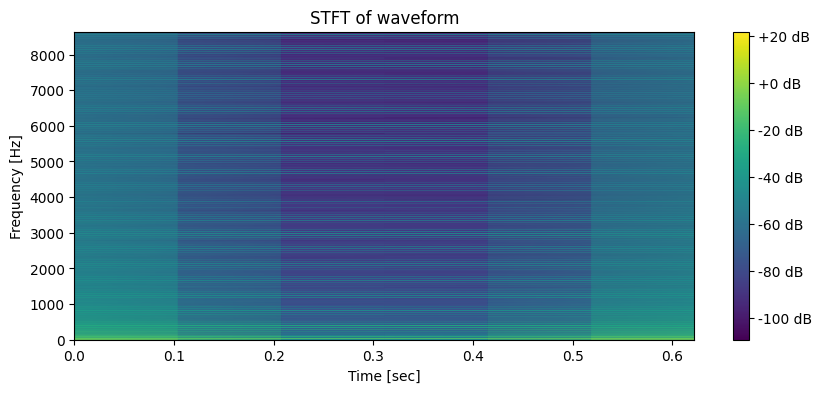

In [7]:
plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 20*np.log10(np.abs(Zxx)), shading='gouraud')
plt.title('STFT of waveform')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(format='%+2.0f dB')
plt.show()